In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Extraer datos del fichero logon.csv
data = pd.read_csv('logon2.csv')

# Eliminar la columna id
data = data.drop('id', axis=1)

# Extraer las clases y la variable objetivo
X = data.drop('activity', axis=1)  # Clases
y = data['activity']  # Variable objetivo

# Dividir datos para entrenamiento (80%) y testeo (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Entrenar el modelo Random Forest 
model = RandomForestClassifier(n_estimators=10)  # Choose the number of trees (n_estimators)
# 10 and 0.1 test_size = acc:0.9067, prec:0.9196, rec:0.9102
# 10 and 0.2 test_size = acc:0.9108, prec:0.9249, rec:0.9119
# 10 and 0.3 test_size = acc:0.9127, prec:0.9266, rec:0.9133
# 100 and 0.3 test_size = acc:0.9063, prec:0.9146, rec:0.9148
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.914566907641797
Precision: 0.9281136586208883
Recall: 0.9153008180888536
F1: 0.9216627098767197


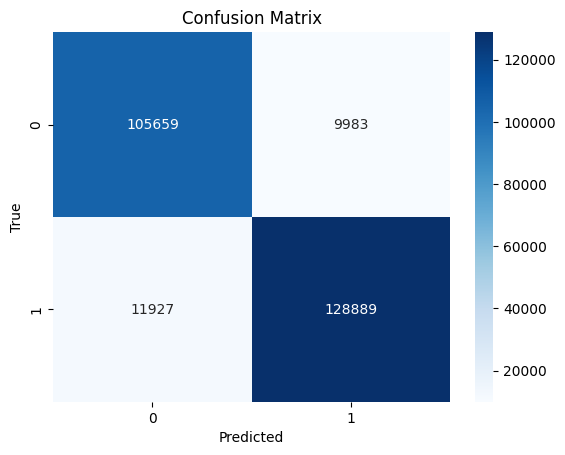

In [6]:
# Dibujar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

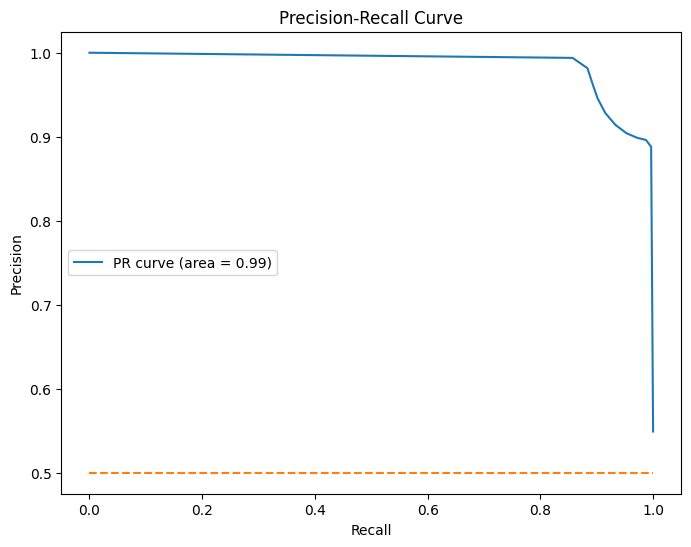

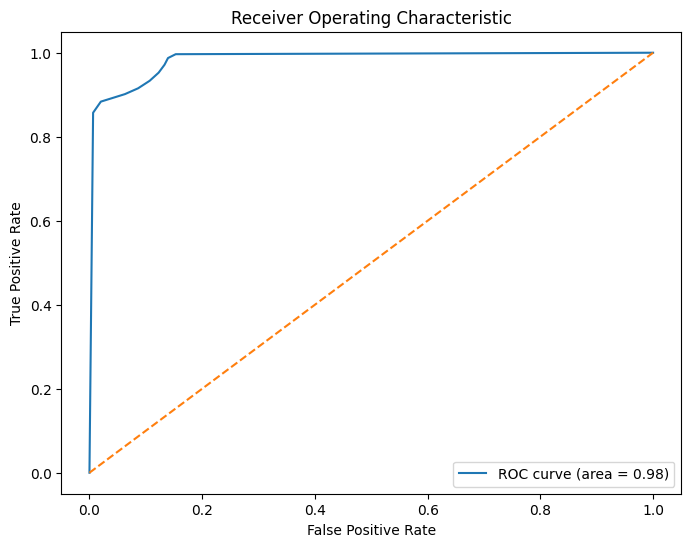

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
pr_auc = auc(recall, precision)

# Curva PR
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()

plt.show()

In [3]:
# Predecir activity para nuevos datos
new_date = 0
new_user = 707
new_pc = 589
new_time = 58525

new_features = [new_date, new_pc, new_time]
new_X = [new_features]

activity_prediction = model.predict(new_X)

if activity_prediction == 1:
    print("Predicted activity: Logon")
else:
    print("Predicted activity: Logoff")

Predicted activity: Logoff


C:\Users\daniw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
